In [3]:
from itertools import permutations
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List

In [4]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray): 
    return np.sum(np.abs(arr - sorted_arr))

In [5]:
def plot_dist(
        arr_size: int,
):
    arr = np.arange(arr_size)
    perms = permutations(arr)
    exp = 0
    sorted = np.array(list(i for i in range(arr_size)))
    scores_dist = []
    for p in perms:
        score = footman(np.array(p),sorted)
        scores_dist.append(score)
        # mean
        exp += (1/math.factorial(arr_size)) * score
    
    sorted = scores_dist.copy()
    sorted.sort()
    median = sorted[len(sorted)//2]
    counts , _, _ = plt.hist(
        scores_dist,
        bins=np.arange(min(scores_dist), max(scores_dist) + 2, 1),
        edgecolor="black"
    )

    mode_bin_index = np.argmax(counts)

    
    plt.title('Distribution of Scores')
    plt.grid(True)
    plt.axvline(x=exp, color='black', linestyle=':', linewidth=2, label=f'E(dist) = {exp:.2f}')
    plt.axvline(x=median, color='red', linestyle=':', linewidth=2, label=f'Median = {median:.2f}')
    plt.axvline(x=mode_bin_index, color='green', linestyle=':', linewidth=2, label=f'Mode = {mode_bin_index:.2f}')
    plt.plot([], [], ' ', label=f"Array Size: {arr_size}")

    plt.legend(loc='upper right')
    plt.xlabel('Spearman Footrule Score')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"distribution_plot/distribution_{arr_size}.png")
    plt.show()

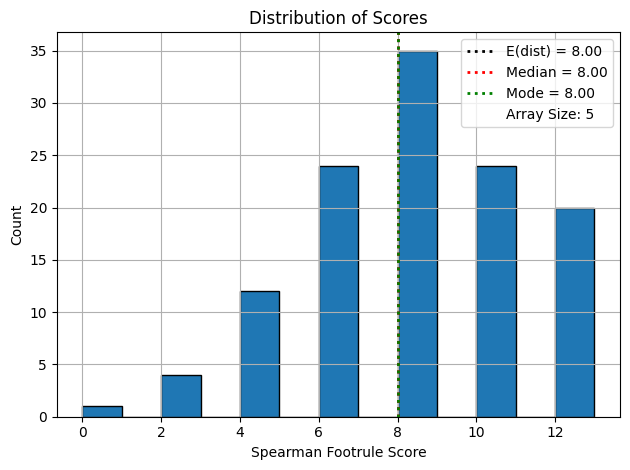

In [6]:
plot_dist(5)

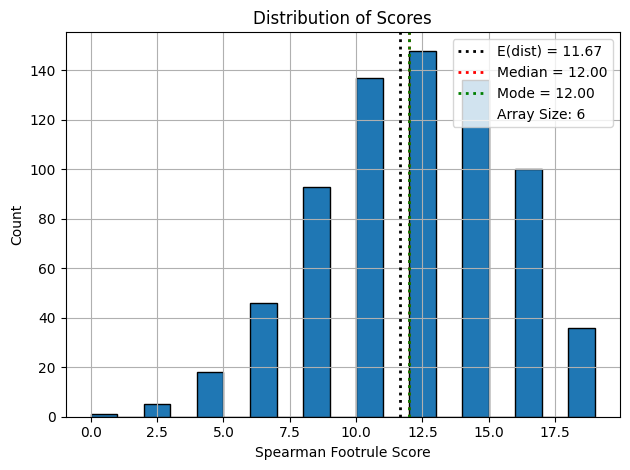

In [7]:
plot_dist(6)

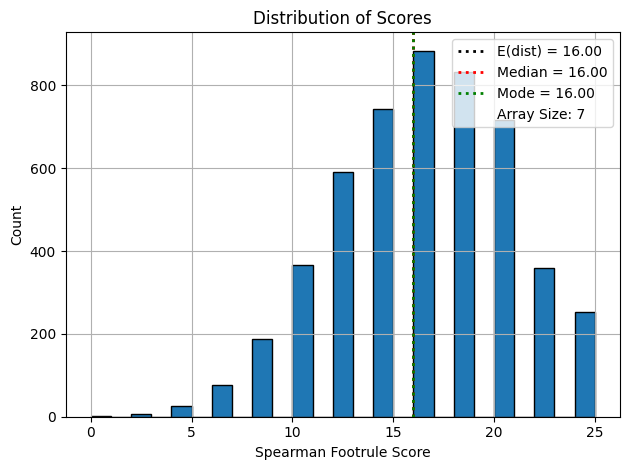

In [8]:
plot_dist(7)

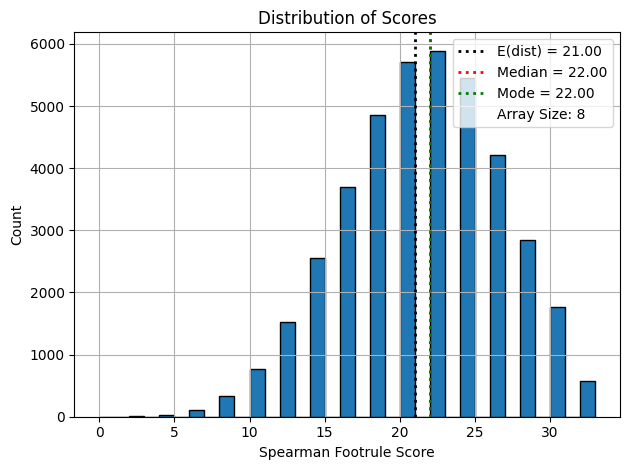

In [9]:
plot_dist(8)

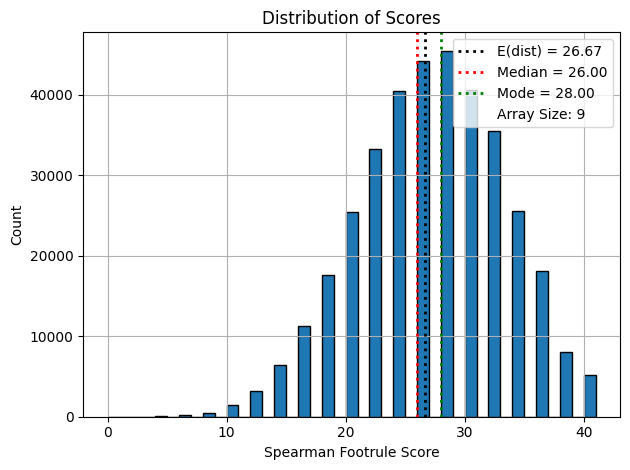

In [10]:
plot_dist(9)

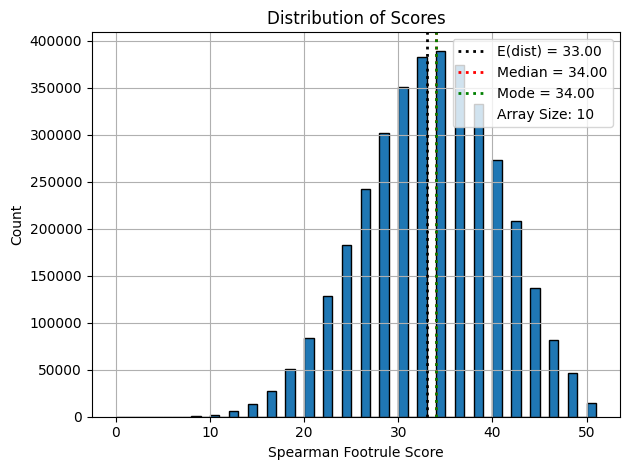

In [11]:
plot_dist(10)

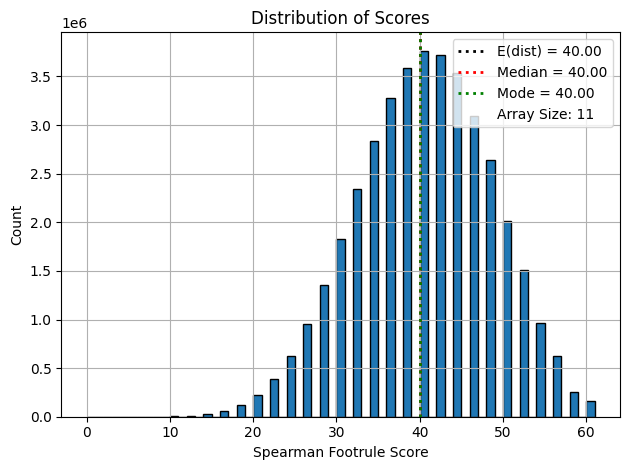

In [12]:
plot_dist(11)

In [ ]:
plot_dist(12)